In [1]:
### 🧪 Kit Prático – Semana 11: Random Forest e Comparação de Modelos
# Tema: Ensemble Learning para melhorar a performance
# Ferramenta: Google Colab
# Dataset: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Passo 1: Carregar os dados
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Passo 2: Preparar os dados
df_model = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})

X = df_model[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_model['Survived']

# Passo 3: Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arvore.fit(X_train, y_train)
y_pred_arvore = modelo_arvore.predict(X_test)

# Passo 5: Treinar o modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Passo 6: Avaliar os modelos
print("\n🌳 Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_arvore))
print(classification_report(y_test, y_pred_arvore))

print("\n🌲 Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# DESAFIO EXTRA:
# Testar a Random Forest variando o número de árvores (n_estimators) para ver o impacto na acurácia.



🌳 Árvore de Decisão
Acurácia: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


🌲 Random Forest
Acurácia: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C:\Users\Administrador\AppData\Local\Temp\ipykernel_14968\86038304.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)


Número de Árvores (n_estimators):  10 | Acurácia: 0.7877
Número de Árvores (n_estimators):  20 | Acurácia: 0.7877
Número de Árvores (n_estimators):  50 | Acurácia: 0.7877
Número de Árvores (n_estimators): 100 | Acurácia: 0.7877
Número de Árvores (n_estimators): 200 | Acurácia: 0.7877
Número de Árvores (n_estimators): 500 | Acurácia: 0.7877


C:\Users\Administrador\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


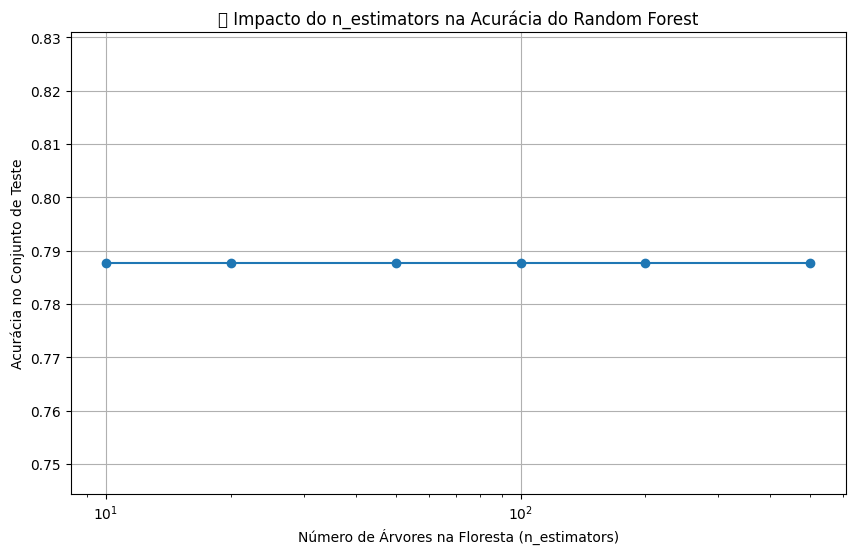

In [2]:
acuracias_rf = []
estimators = [10, 20, 50, 100, 200, 500]

for n in estimators:
    modelo_teste_rf = RandomForestClassifier(n_estimators=n, random_state=42)
    modelo_teste_rf.fit(X_train, y_train)
    
    y_pred_teste = modelo_teste_rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_teste)
    acuracias_rf.append(acc)
    
    print(f"Número de Árvores (n_estimators): {n:3d} | Acurácia: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(estimators, acuracias_rf, marker='o', linestyle='-')
plt.title('📈 Impacto do n_estimators na Acurácia do Random Forest')
plt.xlabel('Número de Árvores na Floresta (n_estimators)')
plt.ylabel('Acurácia no Conjunto de Teste')
plt.xscale('log')
plt.grid(True)
plt.show()
